In [158]:
import numpy as np
import pandas as pd
import sys
import json
import matplotlib.pyplot as plt

In [159]:
def get_gender_race_df(school):
    all_dict = []
    for department in school:
        department_name = department.get('department')
        gender_race_data = department.get('gender_race_data')
        dictionary = {'department': department_name}
        if gender_race_data is not None:
            # gender
            no_genders_name = gender_race_data.get('no_genders_name')
            for k, v in no_genders_name.items():
                dictionary.update({'gender_name_'+k: v})
            no_genders_img = gender_race_data.get('no_genders_img')
            for k, v in no_genders_img.items():
                dictionary.update({'gender_img_'+k: v})

            # race
            no_races_name = gender_race_data.get('no_races_name')
            for k, v in no_races_name.items():
                dictionary.update({'race_name_'+k: v})
            no_races_img = gender_race_data.get('no_races_img')
            for k, v in no_races_img.items():
                dictionary.update({'race_img_'+k: v})

        all_dict.append(dictionary)
    df = pd.DataFrame(all_dict)
    return df

In [174]:
def get_pct_df(df:pd.DataFrame):
    pct_df = pd.DataFrame()
    # pecentages excludes unknown
    pct_df['department'] = df['department']
    pct_df['female_pct_name'] = df['gender_name_female']/(df['gender_name_female'] + df['gender_name_male'])
    pct_df['female_pct_img'] = df['gender_img_female']/(df['gender_img_female'] + df['gender_img_male'])
    pct_df['white_pct_name'] = df['race_name_white']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['white_pct_img'] = df['race_img_white']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['api_pct_name'] = df['race_name_api']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['api_pct_img'] = df['race_img_api']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['black_pct_name'] = df['race_name_black']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['black_pct_img'] = df['race_img_black']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['hispanic_pct_name'] = df['race_name_hispanic']/(df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['hispanic_pct_img'] = df['race_img_hispanic']/(df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    pct_df['gender_unknown_pct_name'] = df['gender_name_unknown']/(df['gender_name_female']+ df['gender_name_male']+ df['gender_name_unknown'])
    pct_df['gender_unknown_pct_img'] = df['gender_img_unknown']/(df['gender_img_female']+ df['gender_img_male']+ df['gender_img_unknown'])
    pct_df['race_unknown_pct_name'] = df['race_name_unknown']/(df['race_name_unknown'] + df['race_name_white'] + df['race_name_api'] + df['race_name_black'] + df['race_name_hispanic'])
    pct_df['race_unknown_pct_img'] = df['race_img_unknown']/(df['race_img_unknown'] + df['race_img_white'] + df['race_img_api'] + df['race_img_black'] + df['race_img_hispanic'])
    return pct_df

# Columbia

In [169]:
with open(sys.path[0] + '/../data/columbia/columbia_w_gender_race_data.json', 'r') as f:
    columbia = json.load(f)

In [170]:
columbia_df = get_gender_race_df(columbia)

In [175]:
columbia_pct_df = get_pct_df(columbia_df)

In [176]:
columbia_pct_df.head()

,department,female_pct_name,female_pct_img,white_pct_name,white_pct_img,api_pct_name,api_pct_img,black_pct_name,black_pct_img,hispanic_pct_name,hispanic_pct_img,gender_unknown_pct_name,gender_unknown_pct_img,race_unknown_pct_name,race_unknown_pct_img
0,Accounting Division,0.250000,0.210526,0.680000,0.736842,0.320000,0.263158,0.0,0.000000,0.000000,0.000000,0.200000,0.240000,0.0,0.240000
1,African American and African Diaspora Studies ...,0.400000,0.192308,0.925926,0.038462,0.037037,0.115385,0.0,0.807692,0.037037,0.038462,0.259259,0.037037,0.0,0.037037
2,Africana Studies (Barnard College),0.833333,0.500000,1.000000,0.250000,0.000000,0.500000,0.0,0.250000,0.000000,0.000000,0.250000,0.000000,0.0,0.000000
3,Anthropology (Barnard College),0.600000,0.166667,0.888889,0.833333,0.111111,0.000000,0.0,0.000000,0.000000,0.166667,0.444444,0.333333,0.0,0.333333
4,Anthropology Department,0.500000,NaN,0.850000,NaN,0.100000,NaN,0.0,NaN,0.050000,NaN,0.100000,1.000000,0.0,1.000000


In [177]:
columbia_pct_df.to_json(sys.path[0] + '/../output/columbia_pct_initial.json', orient='records')

# Dartmouth

In [178]:
with open(sys.path[0] + '/../data/dartmouth/dartmouth_w_gender_race_data.json', 'r') as f:
    dartmouth = json.load(f)

In [179]:
dartmouth_df = get_gender_race_df(dartmouth)

In [180]:
dartmouth_pct_df = get_pct_df(dartmouth_df)

In [181]:
dartmouth_pct_df.to_json(sys.path[0] + '/../output/dartmouth_pct_initial.json', orient='records')

# Plots

In [182]:
bins = [5*i/100 for i in range(21)]

In [183]:
print(bins)

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


## Unknown data

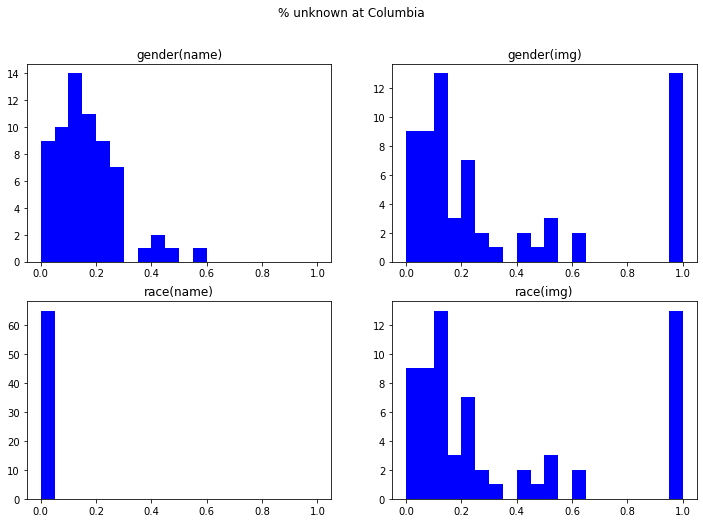

In [188]:
fig, axs = plt.subplots(2, 2, figsize=(12,8))
fig.suptitle('% unknown at Columbia')
axs[0,0].hist(columbia_pct_df['gender_unknown_pct_name'], facecolor='b',bins=bins)
axs[0,0].set_title('gender(name)')
axs[0,1].hist(columbia_pct_df['gender_unknown_pct_img'], facecolor='b',bins=bins)
axs[0,1].set_title('gender(img)')
axs[1,0].hist(columbia_pct_df['race_unknown_pct_name'], facecolor='b',bins=bins)
axs[1,0].set_title('race(name)')
axs[1,1].hist(columbia_pct_df['race_unknown_pct_img'], facecolor='b',bins=bins)
axs[1,1].set_title('race(img)')

plt.show()

## Gender

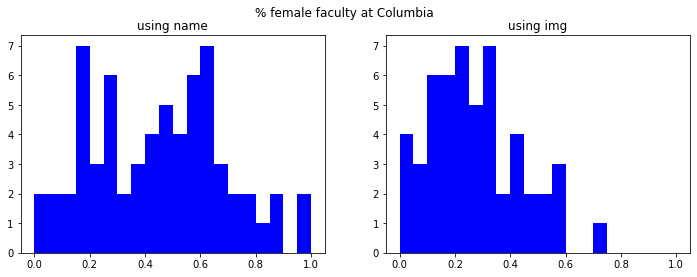

In [184]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% female faculty at Columbia')
ax1.hist(columbia_pct_df['female_pct_name'], facecolor='b',bins=bins)
ax1.set_title('using name')
ax2.hist(columbia_pct_df['female_pct_img'], facecolor='b',bins=bins)
ax2.set_title('using img')
plt.show()

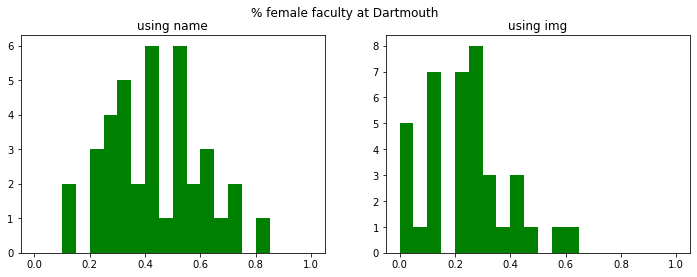

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% female faculty at Dartmouth')
ax1.hist(dartmouth_pct_df['female_pct_name'], facecolor='g', bins=bins)
ax1.set_title('using name')
ax2.hist(dartmouth_pct_df['female_pct_img'], facecolor='g', bins=bins)
ax2.set_title('using img')
plt.show()

# Race

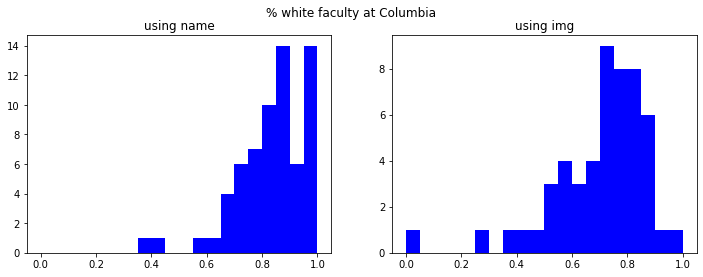

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% white faculty at Columbia')
ax1.hist(columbia_pct_df['white_pct_name'], facecolor='b', bins=bins)
ax1.set_title('using name')
ax2.hist(columbia_pct_df['white_pct_img'], facecolor='b', bins=bins)
ax2.set_title('using img')
plt.show()

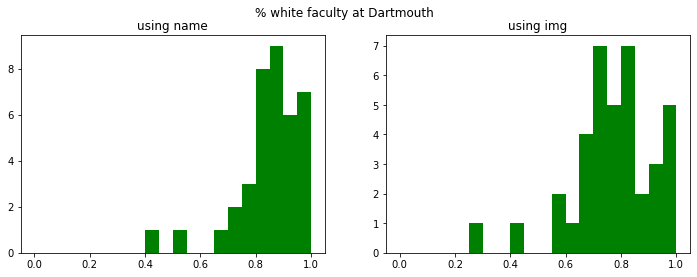

In [150]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% white faculty at Dartmouth')
ax1.hist(dartmouth_pct_df['white_pct_name'], facecolor='g', bins=bins)
ax1.set_title('using name')
ax2.hist(dartmouth_pct_df['white_pct_img'], facecolor='g', bins=bins)
ax2.set_title('using img')
plt.show()

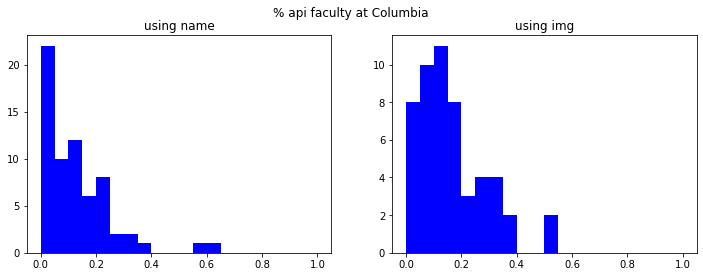

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% api faculty at Columbia')
ax1.hist(columbia_pct_df['api_pct_name'], facecolor='b', bins=bins)
ax1.set_title('using name')
ax2.hist(columbia_pct_df['api_pct_img'], facecolor='b', bins=bins)
ax2.set_title('using img')
plt.show()

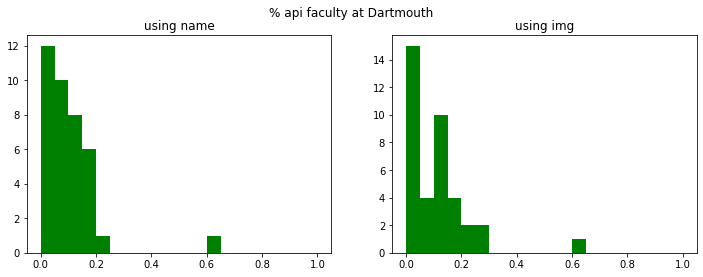

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% api faculty at Dartmouth')
ax1.hist(dartmouth_pct_df['api_pct_name'], facecolor='g', bins=bins)
ax1.set_title('using name')
ax2.hist(dartmouth_pct_df['api_pct_img'], facecolor='g', bins=bins)
ax2.set_title('using img')
plt.show()

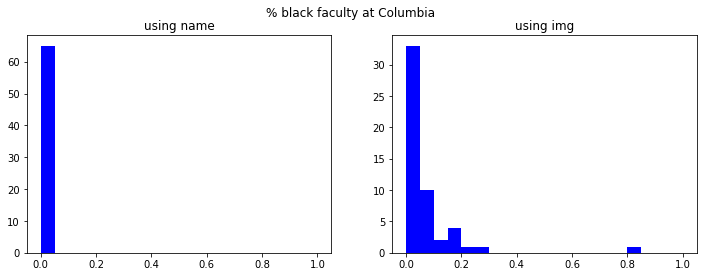

In [145]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% black faculty at Columbia')
ax1.hist(columbia_pct_df['black_pct_name'], facecolor='b', bins=bins)
ax1.set_title('using name')
ax2.hist(columbia_pct_df['black_pct_img'], facecolor='b', bins=bins)
ax2.set_title('using img')
plt.show()

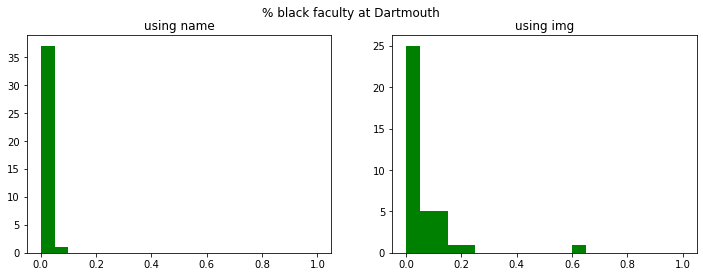

In [151]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% black faculty at Dartmouth')
ax1.hist(dartmouth_pct_df['black_pct_name'], facecolor='g', bins=bins)
ax1.set_title('using name')
ax2.hist(dartmouth_pct_df['black_pct_img'], facecolor='g', bins=bins)
ax2.set_title('using img')
plt.show()

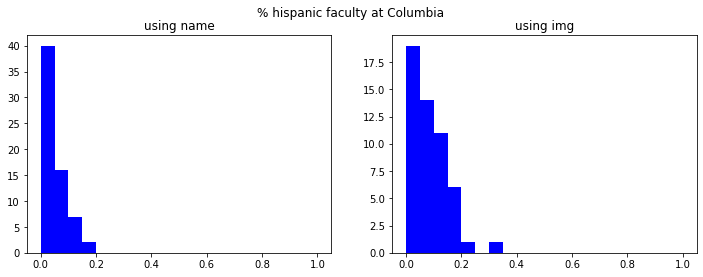

In [152]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% hispanic faculty at Columbia')
ax1.hist(columbia_pct_df['hispanic_pct_name'], facecolor='b', bins=bins)
ax1.set_title('using name')
ax2.hist(columbia_pct_df['hispanic_pct_img'], facecolor='b', bins=bins)
ax2.set_title('using img')
plt.show()

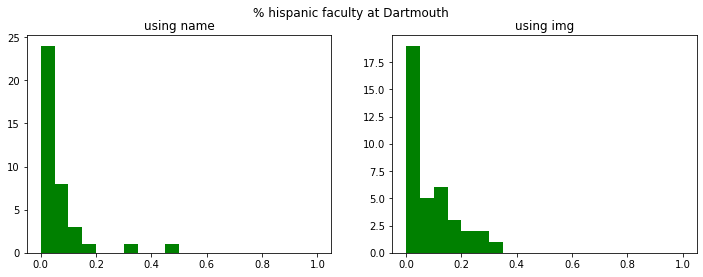

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
fig.suptitle('% hispanic faculty at Dartmouth')
ax1.hist(dartmouth_pct_df['hispanic_pct_name'], facecolor='g', bins=bins)
ax1.set_title('using name')
ax2.hist(dartmouth_pct_df['hispanic_pct_img'], facecolor='g', bins=bins)
ax2.set_title('using img')
plt.show()